# evaluate (words)
evaluate `fasttext` and `tf-idf` vectorizations of words.

### settings and setup

In [71]:
# Executed by system command line
!pip install -q fasttext
!pip install -q gensim
!pip install -q scikit-learn
!pip install -q adjustText

In [72]:
import os
import warnings

import fasttext
import gensim
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text # to adjust how text is labeled in scatter plots

warnings.filterwarnings('ignore')

print(pd.__version__)

0.25.1


In [91]:
DATASET = "./dataset"
TRAIN_TARGET = os.path.abspath(os.path.join(DATASET, 'train')) # add the .txt later.

MODEL = "./model"
MODEL_TARGET = os.path.abspath(os.path.join(MODEL, 'vectorization')) # add the .bin later.

PLOT = "./plots"

### # Samples: 1000

### load model
Load the model from its saved target and also into gensim for evaluation below.

In [74]:
NUM_SAMPLES = 1000

In [75]:
model_target = MODEL_TARGET + "_" + str(NUM_SAMPLES) + ".bin"
print(model_target)

/home/jovyan/shared/lena/model/vectorization_1000.bin


In [76]:
model = fasttext.load_model(model_target)

In [77]:
gensim_model = gensim.models.fasttext.load_facebook_vectors(model_target)

-----

## evaluate

## word embeddings

### nearest neighbors

In [78]:
gensim_model.wv.most_similar(positive=["motion_turnright"])

[('motion_turnleft', 0.9351858496665955),
 ('motion_movesteps', 0.7175217866897583),
 ('motion_ifonedgebounce', 0.6806269288063049),
 ('motion_glideto', 0.6695990562438965),
 ('looks_changeeffectby', 0.6198227405548096),
 ('music_restForBeats', 0.593450665473938),
 ('looks_changesizeby', 0.5922818779945374),
 ('pen_changePenSizeBy', 0.5707441568374634),
 ('music_midiPlayDrumForBeats', 0.5630892515182495),
 ('music_playDrumForBeats', 0.5622583627700806)]

In [79]:
gensim_model.wv.most_similar(positive=["sound_play"])

[('sound_stopallsounds', 0.6239192485809326),
 ('sound_volume', 0.6135751008987427),
 ('sound_changevolumeby', 0.6042556762695312),
 ('sound_playuntildone', 0.5863000154495239),
 ('sound_setvolumeto', 0.4801784157752991),
 ('control_wait_until', 0.4518376290798187),
 ('event_whenkeypressed', 0.42548424005508423),
 ('control_wait', 0.4204246699810028),
 ('looks_nextcostume', 0.4196249842643738),
 ('event_whenthisspriteclicked', 0.4164908826351166)]

### distance

In [80]:
gensim_model.wv.distance('motion_turnright', 'motion_turnleft')

0.06481409072875977

In [81]:
gensim_model.wv.distance('motion_turnright', 'motion_gotoxy')

0.49839115142822266

In [82]:
gensim_model.wv.distance('motion_turnright', 'sound_play')

0.7562812268733978

In [83]:
gensim_model.wv.distance('motion_turnleft', 'sound_play')

0.8013663440942764

In [84]:
gensim_model.wv.distance('motion_turnleft', 'looks_show')

0.7016168534755707

In [85]:
gensim_model.wv.distance('motion_turnright', 'event_whenflagclicked')

0.5953353047370911

In [86]:
gensim_model.wv.distance('motion_turnright', 'pen_stamp')

0.7769972085952759

### principal component analysis (t-sne)

In [87]:
word = 'motion_turnright'
k = 5
gensim_model.similar_by_word(word, topn=k)

[('motion_turnleft', 0.9351858496665955),
 ('motion_movesteps', 0.7175217866897583),
 ('motion_ifonedgebounce', 0.6806269288063049),
 ('motion_glideto', 0.6695990562438965),
 ('looks_changeeffectby', 0.6198227405548096)]

In [88]:
# get a list of all the unique symbols in (entire) corpus
def get_unique_words(path):
    with open(path, 'r') as file:
        content = file.read()
        content = content.split('\n')
        content = " ".join(content)
        symbols = content.split(' ')
        symbols = set(symbols)
        return symbols

path = os.path.abspath(os.path.join(DATASET, 'dataset.txt'))
print(path)
print('\n')

symbols = get_unique_words(path)
symbols = list(symbols)
symbols = symbols[1:] # get rid of the first element which is the empty string ""
print(symbols)

/home/jovyan/shared/lena/dataset/dataset.txt


['wedo2_setLightHue', 'ev3_getMotorPosition', 'sound_seteffectto', 'boost_setMotorDirection', 'sensing_loud', 'control_forever', 'boost_setLightHue', 'pen_changePenColorParamBy', 'wedo2_startMotorPower', 'sensing_touchingobject', '_VAR_', 'operator_join', 'data_deleteoflist', 'event_broadcastandwait', 'text2speech_speakAndWait', 'gdxfor_getTilt', 'sensing_answer', 'wedo2_getTiltAngle', '_BOOLARG_', 'looks_changesizeby', 'ev3_getDistance', 'motion_turnleft', 'data_hidelist', 'control_if_else', 'motion_pointtowards', 'control_start_as_clone', 'operator_or', 'operator_not', 'looks_sayforsecs', 'looks_say', 'looks_nextbackdrop', 'data_itemnumoflist', 'sensing_loudness', 'motion_glideto', 'motion_goto', 'microbit_displaySymbol', 'wedo2_getDistance', 'event_broadcast', 'control_while', 'looks_nextcostume', 'music_setInstrument', 'videoSensing_setVideoTransparency', 'sensing_askandwait', 'control_repeat', 'music_restForBeats', 'music_playDrumForB

In [97]:
def visualize_clustering(model, words, img_path, ndims=128):
    embeddings = []
    
    # get the embedding corresponding to each word in our dictionary
    for word in words:
        # append the embedding for that word
        embeddings.append(model[word]) 
    
    embeddings = np.array(embeddings)
    
    # fit tsne on this dataset – 2 components
    tsne = TSNE(n_components=2)
    tsne_fitted = tsne.fit_transform(embeddings)
    
    # plot these embeddings on these new dimensions to visualize
    x_coords = tsne_fitted[:, 0] # first component
    y_coords = tsne_fitted[:, 1] # second component
    
    texts = []
    plt.figure(figsize=(30, 30))
    plt.scatter(x_coords, y_coords)
    for word, x, y in zip(words, x_coords, y_coords):
#         plt.annotate(word, xy=(x, y), xytext=(0, 5), textcoords='offset points', ha='center')
        texts.append(plt.text(x, y, word, ha='center', va='center'))
#     plt.xlim(x_coords.min()+5, x_coords.max()+5)
#     plt.ylim(y_coords.min()+5, y_coords.max()+5)  
    
    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    plt.savefig(img_path, format='png')
    plt.show()
    
    return embeddings

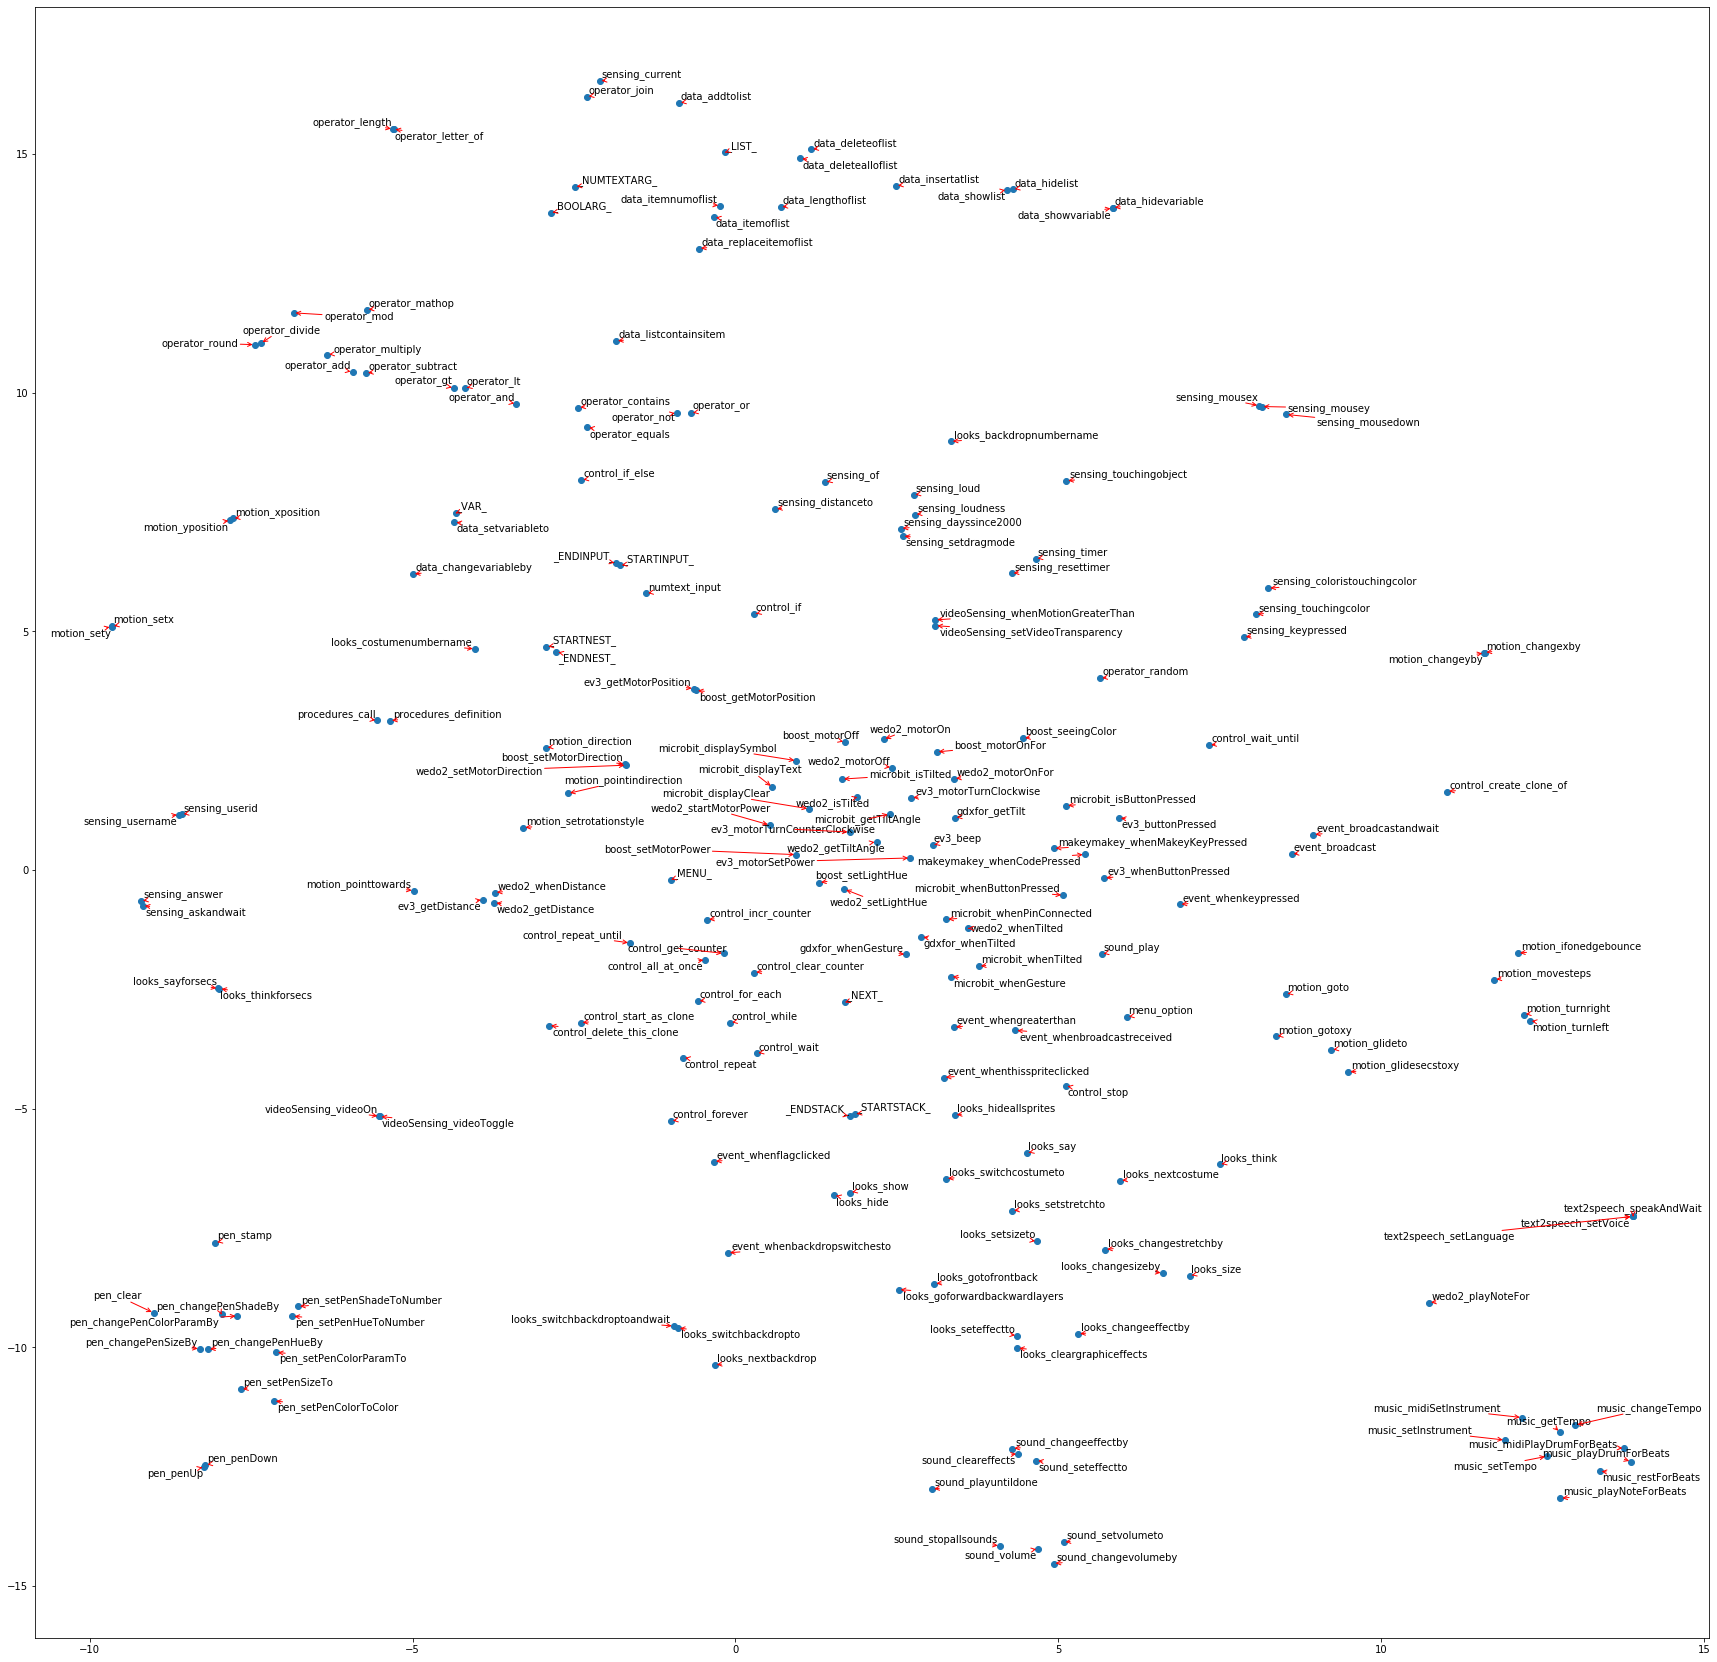

In [107]:
img_path = os.path.abspath(os.path.join(PLOT, 'tsne_all_words.png'))
embeddings = visualize_clustering(model, symbols, img_path, ndims=128)

In [122]:
# Andrew's function from toxicity workb
def display_closestwords_tsnescatterplot(model, word, img_path, figure_size=(20, 20), k=10):
    arr = np.empty((0,128), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word, topn=k)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # Find TSNE coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]

    # Render scatter plot
    plt.figure(figsize=figure_size)
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    
    plt.savefig(img_path, format='png')
    plt.show()

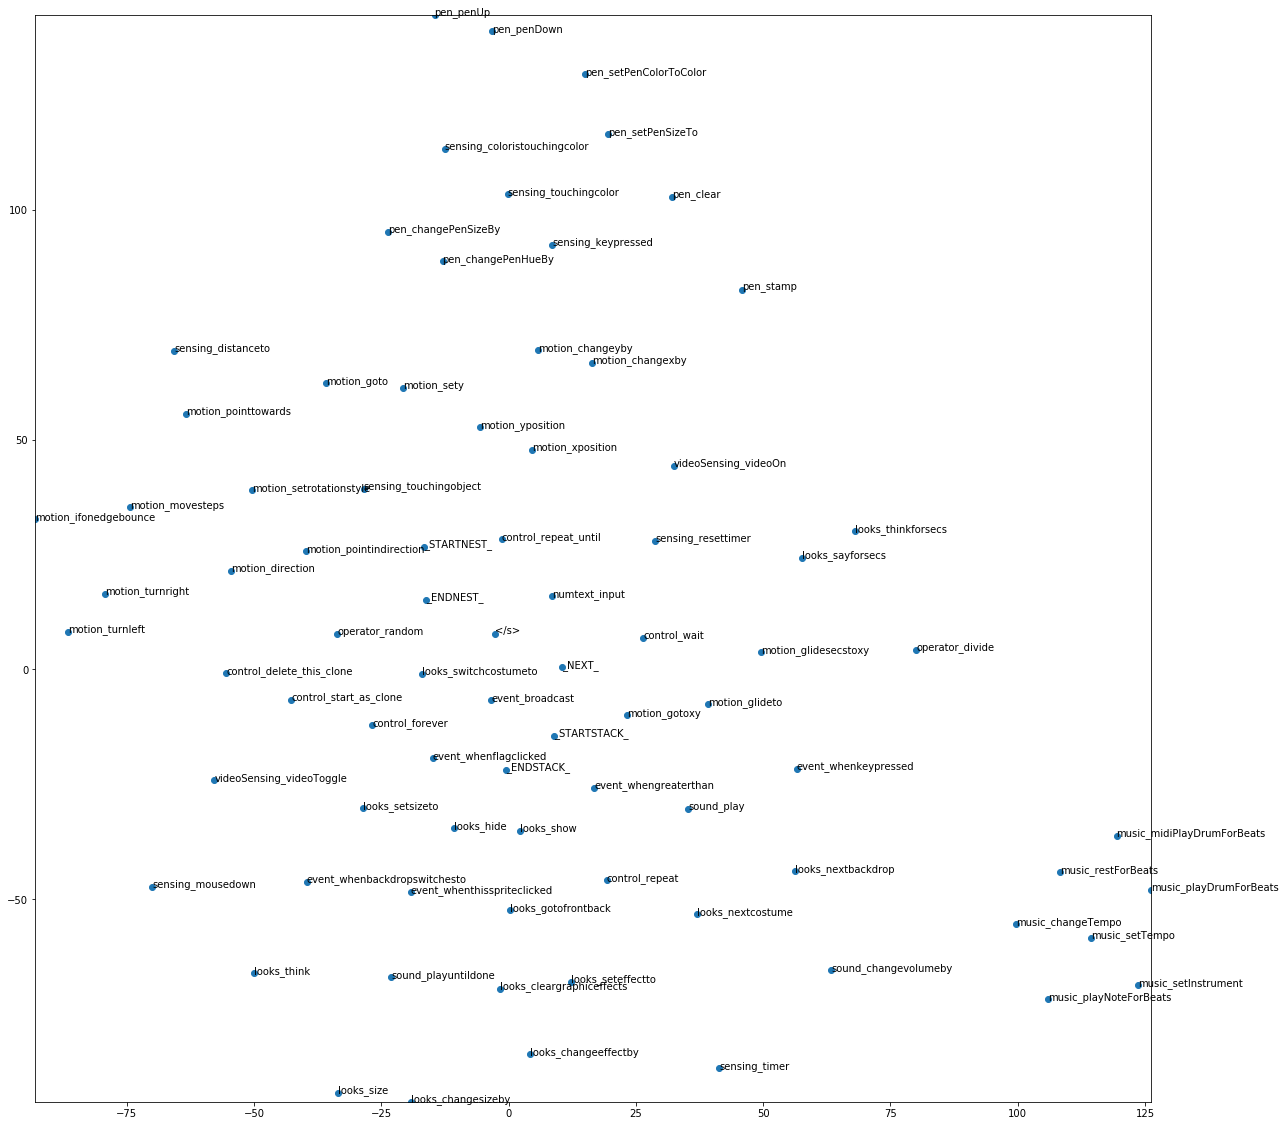

In [121]:
word = 'motion_turnright'
num_closest_words = 80
filename = 'tsne_' + word + '_' + str(num_closest_words) + '.png'
img_path = os.path.abspath(os.path.join(PLOT, filename))
display_closestwords_tsnescatterplot(gensim_model, word, img_path, k=num_closest_words)

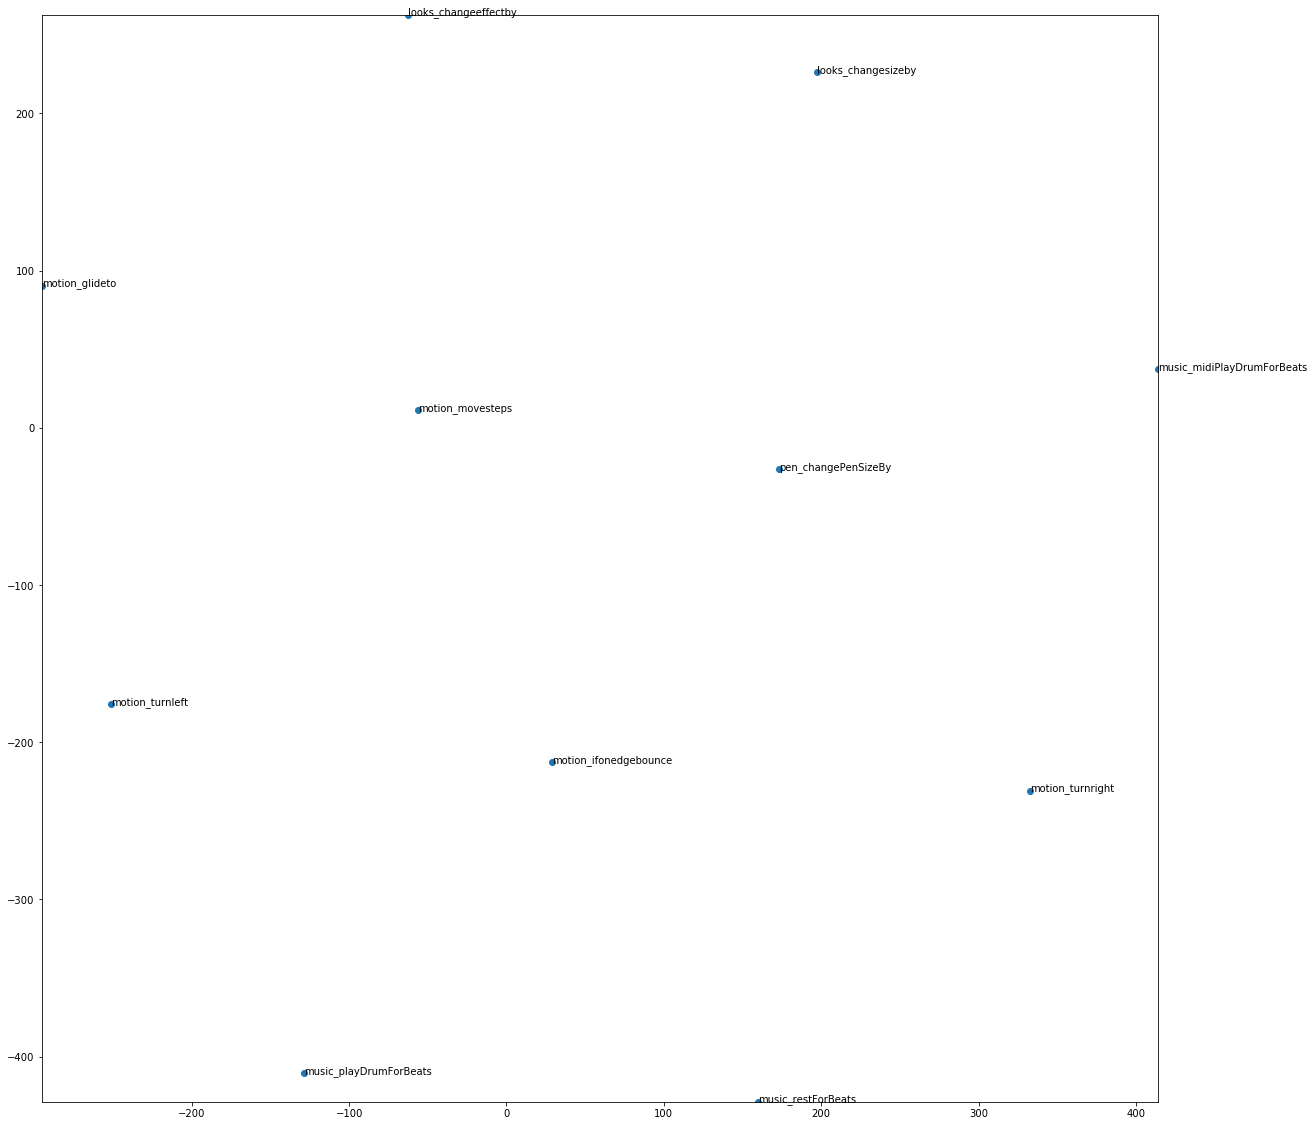

In [124]:
word = 'motion_turnright'
num_closest_words = 10
filename = 'tsne_' + word + '_' + str(num_closest_words) + '.png'
img_path = os.path.abspath(os.path.join(PLOT, filename))
display_closestwords_tsnescatterplot(gensim_model, word, img_path , k=num_closest_words)

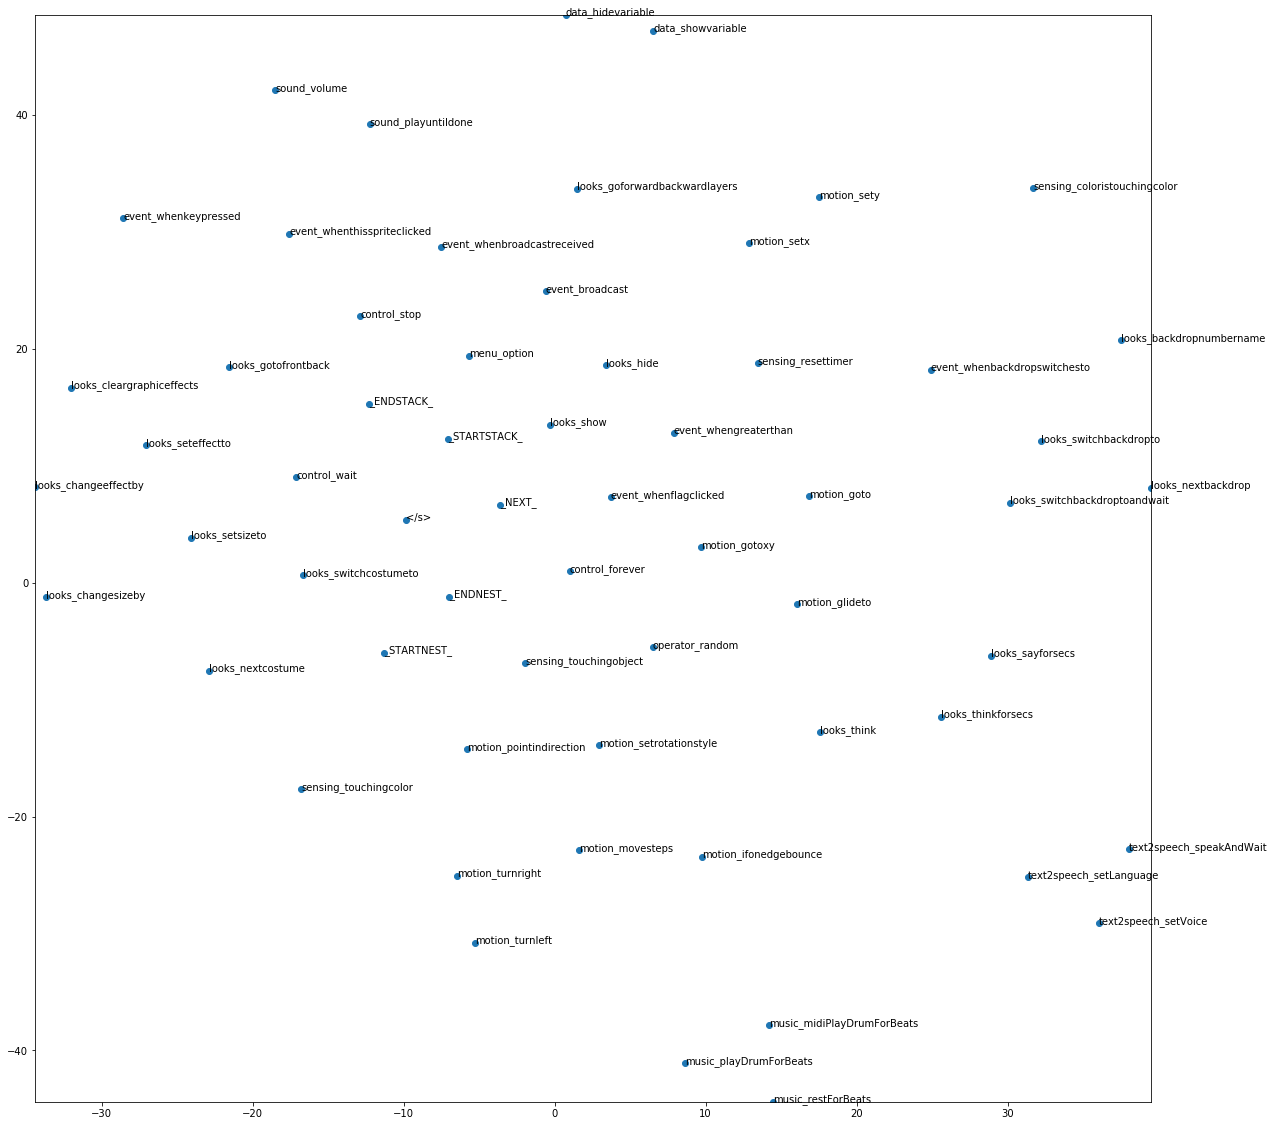

In [126]:
word = 'event_whenflagclicked'
num_closest_words = 60
filename = 'tsne_' + word + '_' + str(num_closest_words) + '.png'
img_path = os.path.abspath(os.path.join(PLOT, filename))
display_closestwords_tsnescatterplot(gensim_model, word, img_path, k=num_closest_words)

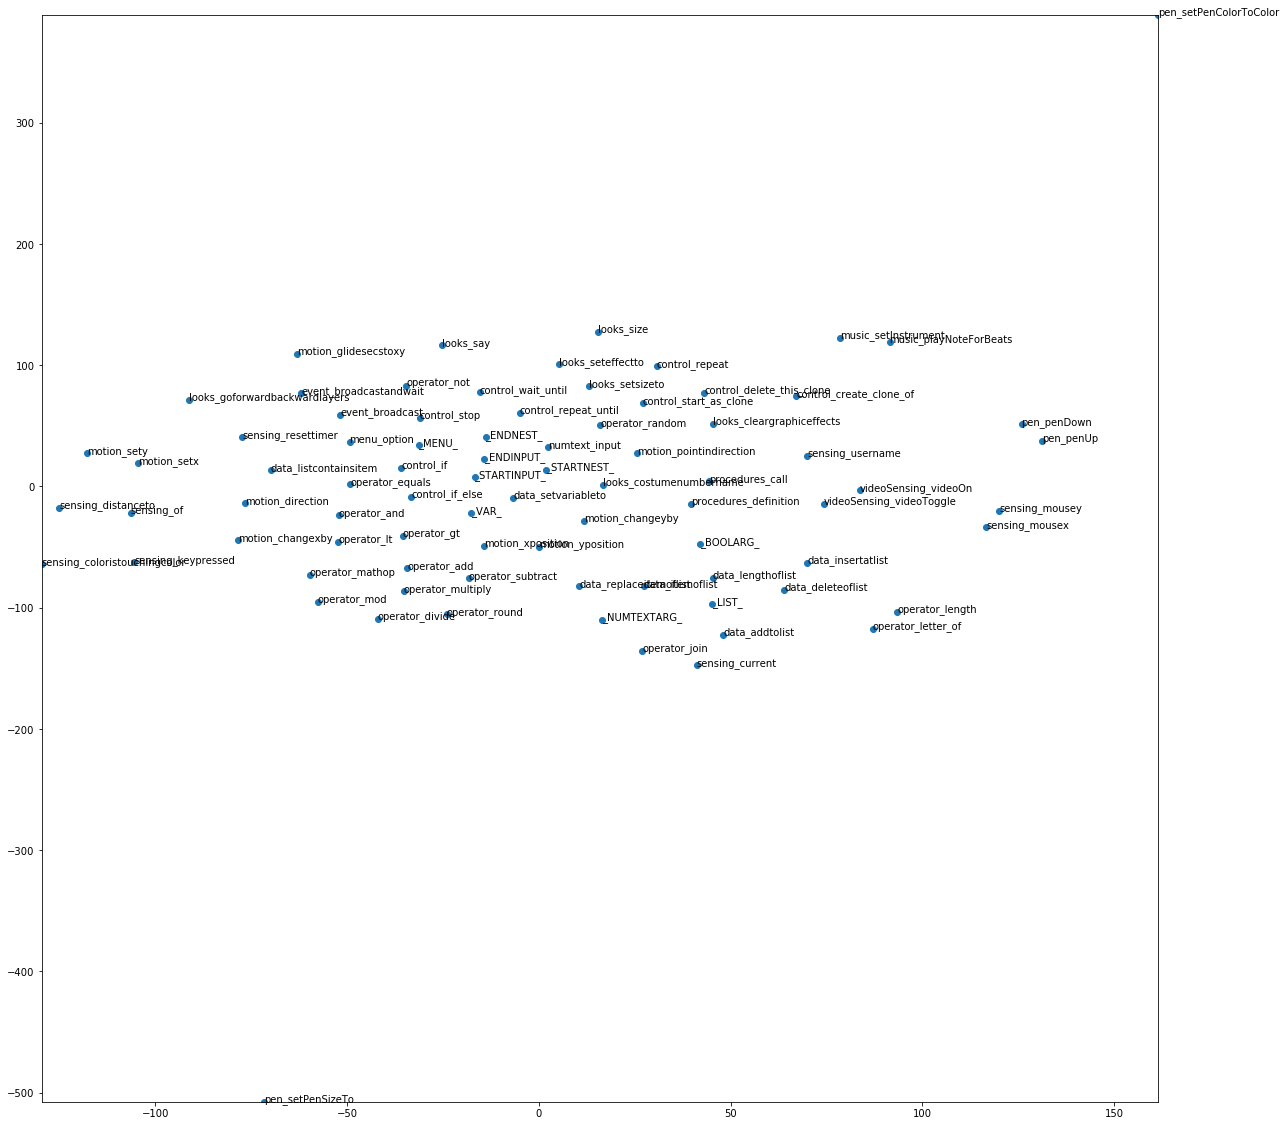

In [127]:
word = 'procedures_call'
num_closest_words = 80
filename = 'tsne_' + word + '_' + str(num_closest_words) + '.png'
img_path = os.path.abspath(os.path.join(PLOT, filename))
display_closestwords_tsnescatterplot(gensim_model, word, img_path, k=num_closest_words)
